<a href="https://colab.research.google.com/github/nravinuthala/EIPAssignments/blob/master/Assignment2/assignment2_ninth_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install and import keras

In [1]:
#https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Import necessary stuff

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


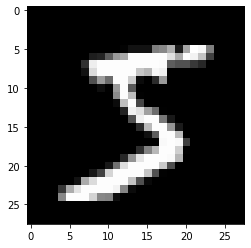

In [4]:
print(X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap = "gray")

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255
X_test = X_test/255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [111]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', use_bias=False, input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False)) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu', use_bias=False)) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) # 12

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False)) # 10
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False)) # 8
model.add(BatchNormalization())
model.add(Dropout(0.1))

'''model.add(Convolution2D(10, 1, 1, activation='relu')) # 8
model.add(MaxPooling2D(pool_size=(2, 2))) # 4'''

model.add(Convolution2D(32, 3, 3, activation='relu', use_bias=False)) # 6
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3, activation='relu', use_bias=False)) # 4
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 4, 4, use_bias=False))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", use_bias=False, input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), acti

In [112]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_238 (Conv2D)          (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_160 (Bat (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_157 (Dropout)        (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_239 (Conv2D)          (None, 24, 24, 16)        1152      
_________________________________________________________________
batch_normalization_161 (Bat (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_158 (Dropout)        (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_240 (Conv2D)          (None, 24, 24, 10)      

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [114]:
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, 
          validation_data=(X_test, Y_test), 
          callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 23s 380us/step - loss: 0.2136 - acc: 0.9320 - val_loss: 0.0645 - val_acc: 0.9800
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 11s 184us/step - loss: 0.0619 - acc: 0.9805 - val_loss: 0.0413 - val_acc: 0.9867
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 11s 183us/step - loss: 0.0475 - acc: 0.9849 - val_loss: 0.0322 - val_acc: 0.9905
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 11s 183us/step - loss: 0.0395 - acc: 0.9875 - val_loss: 0.0283 - val_acc: 0.9907
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [84]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.02001580704568478, 0.9941]
